In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('superstore_data.csv', encoding='ISO-8859-1')
print("Initial Dataset Shape:",df.shape)
df.head()

Initial Dataset Shape: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
#Data cleaning
print("Missing values:", df.isnull().sum())

#dropping duplicates
df.drop_duplicates(inplace=True)

#Convert Order Date and Ship Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
print("Cleaned Dataset Shape:",df.shape)

Missing values: Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Cleaned Dataset Shape: (9994, 21)


In [8]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


Total Sales: $2,297,200.86
Total Profit: $286,397.02


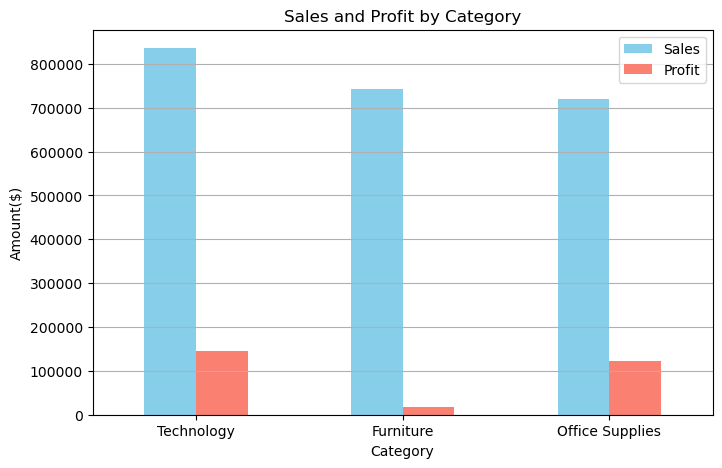

In [9]:
#Sales and Profit Analysis
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")

#Profit vs Sales by Category
category_summary = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
category_summary.plot(kind='bar', figsize=(8,5), color=['skyblue', 'salmon'])
plt.title('Sales and Profit by Category')
plt.ylabel('Amount($)')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.show()

In [10]:
#Pivot Table: Sales and Profit by Region & Category
pivot = pd.pivot_table(df, index='Region', columns='Category',values=['Sales','Profit'],aggfunc='sum',margins=True)
pivot

Profit                                                  Sales  \
Category   Furniture Office Supplies   Technology          All    Furniture   
Region                                                                        
Central   -2871.0494       8879.9799   33697.4320   39706.3625  163797.1638   
East       3046.1658      41014.5791   47462.0351   91522.7800  208291.2040   
South      6771.2061      19986.3928   19991.8314   46749.4303  117298.6840   
West      11504.9503      52609.8490   44303.6496  108418.4489  252612.7435   
All       18451.2728     122490.8008  145454.9481  286397.0217  741999.7953   

                                                    
Category Office Supplies  Technology           All  
Region                                              
Central       167026.415  170416.312  5.012399e+05  
East          205516.055  264973.981  6.787812e+05  
South         125651.313  148771.908  3.917219e+05  
West          220853.249  251991.832  7.254578e+05  
All           719047.032  836154.033  2.297201e+06

In [12]:
#Category-Based Filtering: Least Profitable Sub-Categories
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()

subcat_profit


Sub-Category
Tables        -17725.4811
Bookcases      -3472.5560
Supplies       -1189.0995
Fasteners        949.5182
Machines        3384.7569
Labels          5546.2540
Art             6527.7870
Envelopes       6964.1767
Furnishings    13059.1436
Appliances     18138.0054
Storage        21278.8264
Chairs         26590.1663
Binders        30221.7633
Paper          34053.5693
Accessories    41936.6357
Phones         44515.7306
Copiers        55617.8249
Name: Profit, dtype: float64

C:\Users\rajat\AppData\Local\Temp\ipykernel_17252\1615593001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcat_profit.values, y=subcat_profit.index, palette='coolwarm')


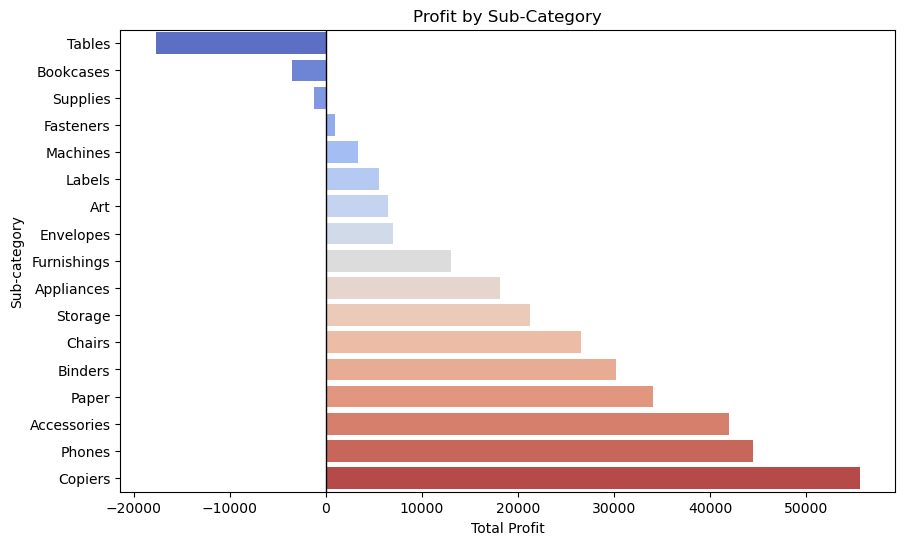

Sub-categories with negative profit: Sub-Category
Tables      -17725.4811
Bookcases    -3472.5560
Supplies     -1189.0995
Name: Profit, dtype: float64


In [13]:
#plot
plt.figure(figsize=(10,6))
sns.barplot(x=subcat_profit.values, y=subcat_profit.index, palette='coolwarm')
plt.title('Profit by Sub-Category')
plt.xlabel('Total Profit')
plt.ylabel('Sub-category')
plt.axvline(0, color='black' ,linewidth=1)
plt.show()

print("Sub-categories with negative profit:",subcat_profit[subcat_profit < 0])

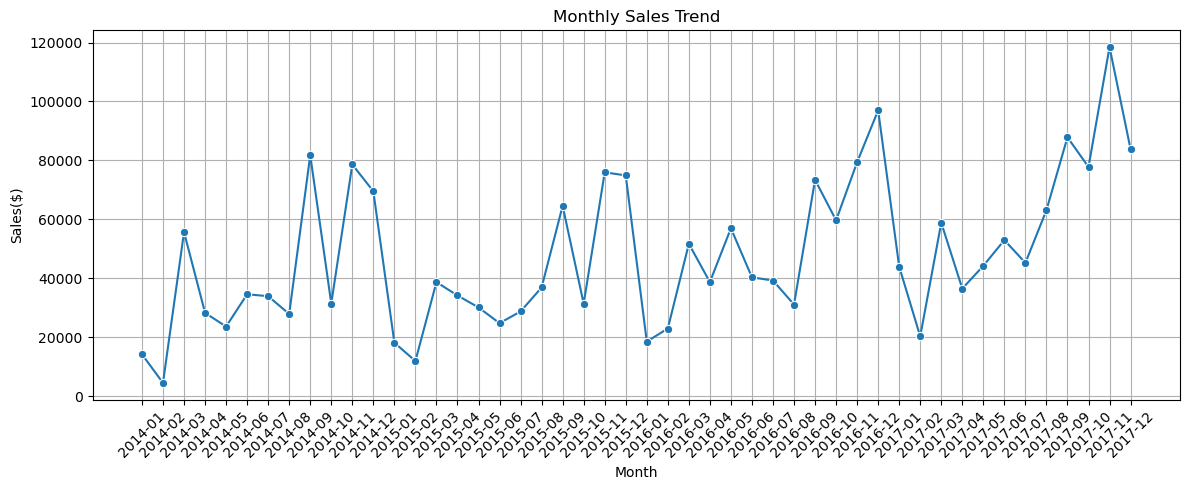

In [15]:
#Visualizing Monthly Sales Trends
df['YearMonth'] = df['Order Date'].dt.to_period('M')

#Group by month
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

#Plot
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales, x='YearMonth', y='Sales', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales($)')
plt.grid(True)
plt.tight_layout()
plt.show()